In [1]:
import torch
print(f'torch version: {torch.__version__}')
print("GPU доступен:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("Название устройства:", torch.cuda.get_device_name(0))
use_gpu = torch.cuda.is_available()
is_amd = torch.version.hip is not None
device = 'cuda' if use_gpu else 'cpu'

print(f"Using device: {device}")
if is_amd:
    print("Running on AMD GPU with ROCm")
elif use_gpu:
    print("Running on NVIDIA GPU with CUDA")
else:
    print("Running on CPU")

torch version: 2.5.1+rocm6.2
GPU доступен: True
Название устройства: AMD Radeon RX 7800 XT
Using device: cuda
Running on AMD GPU with ROCm


In [3]:
import tensorflow as tf
print(f' TensorFlow version: {tf.__version__}')
print("GPU доступны:", tf.config.list_physical_devices('GPU'))
print("Собран с поддержкой ROCm:", tf.test.is_built_with_rocm())


 TensorFlow version: 2.16.1
GPU доступны: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Собран с поддержкой ROCm: True


In [4]:
import numpy as np
print(f'NumPy version: {np.__version__}')
import matplotlib
print(f'Matplotlib version: {matplotlib.__version__}')
import matplotlib.pyplot as plt
import pandas as pd
print(f'Pandas version: {pd.__version__}')
import datetime
from datetime import datetime
import seaborn as sns
print(f'Seaborn version: {sns.__version__}')
import scipy as sp
print(f'SciPy version: {sp.__version__}')
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from scipy.stats import f_oneway
import torch
import torch.nn as nn
from sklearn.metrics import mean_squared_error, r2_score
import joblib
print(f'joblib version: {joblib.__version__}')
import pickle
import os

NumPy version: 1.26.4
Matplotlib version: 3.9.2
Pandas version: 2.2.3
Seaborn version: 0.13.2
SciPy version: 1.13.1
joblib version: 1.4.2


In [14]:
def df_info(df:pd.DataFrame)-> None:
    """
    Функция df_info выводит информацию о DataFrame.
    """
    print("Названия столбцов")
    print(df.columns) 
    print("-----------------------------------------------------------------------------------------")
    print("Описание столбцов")
    print(df.info()) 
    print("-----------------------------------------------------------------------------------------")
    print("Статистические данные")
    # Форматируем результат describe() до двух знаков после запятой
    formatted = df.describe().apply(lambda x: x.apply('{:.2f}'.format))
    print(formatted)
    print("-----------------------------------------------------------------------------------------")
    print("Проверка на null значений")
    print(df.isnull().sum()) 

In [52]:
weather_df = pd.read_csv('data/weather.csv', sep=';')
display(weather_df.head())


/tmp/ipykernel_258632/3907815664.py:1: DtypeWarning: Columns (21,28) have mixed types. Specify dtype option on import or set low_memory=False.
  weather_df = pd.read_csv('data/weather.csv', sep=';')


,datetime,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
16.12.2024 21:00,-1.3,721.8,735.4,-1.4,95.0,"Ветер, дующий с юго-запада",1.0,NaN,NaN,100%.,...,NaN,3.3,-2.0,3.0,12.0,NaN,NaN,NaN,NaN,NaN
16.12.2024 18:00,-2.0,723.2,736.9,-3.6,93.0,"Ветер, дующий с юго-юго-востока",3.0,NaN,NaN,100%.,...,NaN,1.8,-3.0,2.0,12.0,NaN,NaN,NaN,NaN,NaN
16.12.2024 15:00,-1.3,726.8,740.6,-3.2,74.0,"Ветер, дующий с юга",2.0,NaN,NaN,100%.,...,NaN,20.0,-5.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16.12.2024 12:00,-1.0,730.0,743.8,-1.8,80.0,"Штиль, безветрие",0.0,NaN,NaN,100%.,...,NaN,20.0,-4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16.12.2024 09:00,-0.9,731.8,745.6,-0.6,90.0,"Ветер, дующий с западо-юго-запада",1.0,NaN,NaN,100%.,...,NaN,19.0,-2.4,0.4,12.0,NaN,NaN,Ровный слой слежавшегося или мокрого снега пок...,18.0,NaN


In [17]:
df_info(weather_df)

Названия столбцов
Index(['datetime', 'T', 'Po', 'P', 'Pa', 'U', 'DD', 'Ff', 'ff10', 'ff3', 'N',
       'WW', 'W1', 'W2', 'Tn', 'Tx', 'Cl', 'Nh', 'H', 'Cm', 'Ch', 'VV', 'Td',
       'RRR', 'tR', 'E', 'Tg', 'E'', 'sss'],
      dtype='object')
-----------------------------------------------------------------------------------------
Описание столбцов
<class 'pandas.core.frame.DataFrame'>
Index: 67390 entries, 16.12.2024 21:00 to 01.02.2005 03:00
Data columns (total 29 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  67383 non-null  float64
 1   T         67214 non-null  float64
 2   Po        67253 non-null  float64
 3   P         43830 non-null  float64
 4   Pa        67346 non-null  float64
 5   U         67340 non-null  object 
 6   DD        67340 non-null  float64
 7   Ff        199 non-null    float64
 8   ff10      1479 non-null   float64
 9   ff3       63658 non-null  object 
 10  N         67390 non-null  object 
 11  WW       

In [53]:
weather_df
display(weather_df.head())

,datetime,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
16.12.2024 21:00,-1.3,721.8,735.4,-1.4,95.0,"Ветер, дующий с юго-запада",1.0,NaN,NaN,100%.,...,NaN,3.3,-2.0,3.0,12.0,NaN,NaN,NaN,NaN,NaN
16.12.2024 18:00,-2.0,723.2,736.9,-3.6,93.0,"Ветер, дующий с юго-юго-востока",3.0,NaN,NaN,100%.,...,NaN,1.8,-3.0,2.0,12.0,NaN,NaN,NaN,NaN,NaN
16.12.2024 15:00,-1.3,726.8,740.6,-3.2,74.0,"Ветер, дующий с юга",2.0,NaN,NaN,100%.,...,NaN,20.0,-5.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16.12.2024 12:00,-1.0,730.0,743.8,-1.8,80.0,"Штиль, безветрие",0.0,NaN,NaN,100%.,...,NaN,20.0,-4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16.12.2024 09:00,-0.9,731.8,745.6,-0.6,90.0,"Ветер, дующий с западо-юго-запада",1.0,NaN,NaN,100%.,...,NaN,19.0,-2.4,0.4,12.0,NaN,NaN,Ровный слой слежавшегося или мокрого снега пок...,18.0,NaN


In [18]:
weather_df = pd.read_csv('data/weather.csv', sep=';', usecols=[1])
display(weather_df.head())

,T
16.12.2024 21:00,-1.3
16.12.2024 18:00,-2.0
16.12.2024 15:00,-1.3
16.12.2024 12:00,-1.0
16.12.2024 09:00,-0.9


In [19]:
weather_df['date_time'] = weather_df.index
weather_df.reset_index(drop=True, inplace=True)
weather_df

,T,date_time
0,-1.3,16.12.2024 21:00
1,-2.0,16.12.2024 18:00
2,-1.3,16.12.2024 15:00
3,-1.0,16.12.2024 12:00
4,-0.9,16.12.2024 09:00
...,...,...
67385,-6.6,01.02.2005 15:00
67386,-7.1,01.02.2005 12:00
67387,-8.6,01.02.2005 09:00
67388,-8.2,01.02.2005 06:00


In [20]:
result = weather_df.copy()
result['TARGET_DATE'] = pd.to_datetime(result['date_time'], format='%d.%m.%Y %H:%M')
#  Признаки для дней недели
weekdays = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
for i, day in enumerate(weekdays):
    result[day] = (result['TARGET_DATE'].dt.weekday == i).astype(float)

# Признаки для сезонов
seasons = {
    'Зима': [12, 1, 2],
    'Весна': [3, 4, 5],
    'Лето': [6, 7, 8],
    'Осень': [9, 10, 11]
}
for season, months in seasons.items():
    result[season] = result['TARGET_DATE'].dt.month.isin(months).astype(float)

# Признаки для месяцев
months = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь',
          'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
for i, month in enumerate(months, start=1):
    result[month] = (result['TARGET_DATE'].dt.month == i).astype(float)

In [21]:
result.drop(columns=['date_time'], inplace=True)

In [22]:
result

,T,TARGET_DATE,Понедельник,Вторник,Среда,Четверг,Пятница,Суббота,Воскресенье,Зима,...,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь,Октябрь,Ноябрь,Декабрь
0,-1.3,2024-12-16 21:00:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-2.0,2024-12-16 18:00:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.3,2024-12-16 15:00:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.0,2024-12-16 12:00:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.9,2024-12-16 09:00:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67385,-6.6,2005-02-01 15:00:00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67386,-7.1,2005-02-01 12:00:00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67387,-8.6,2005-02-01 09:00:00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67388,-8.2,2005-02-01 06:00:00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
df_info(result)

Названия столбцов
Index(['T', 'TARGET_DATE', 'Понедельник', 'Вторник', 'Среда', 'Четверг',
       'Пятница', 'Суббота', 'Воскресенье', 'Зима', 'Весна', 'Лето', 'Осень',
       'Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август',
       'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'],
      dtype='object')
-----------------------------------------------------------------------------------------
Описание столбцов
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67390 entries, 0 to 67389
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   T            67383 non-null  float64       
 1   TARGET_DATE  67390 non-null  datetime64[ns]
 2   Понедельник  67390 non-null  float64       
 3   Вторник      67390 non-null  float64       
 4   Среда        67390 non-null  float64       
 5   Четверг      67390 non-null  float64       
 6   Пятница      67390 non-null  float64       
 7   Суббота      67

In [24]:
result = result[result['T'].notna()]

In [25]:
df_info(result)

Названия столбцов
Index(['T', 'TARGET_DATE', 'Понедельник', 'Вторник', 'Среда', 'Четверг',
       'Пятница', 'Суббота', 'Воскресенье', 'Зима', 'Весна', 'Лето', 'Осень',
       'Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август',
       'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'],
      dtype='object')
-----------------------------------------------------------------------------------------
Описание столбцов
<class 'pandas.core.frame.DataFrame'>
Index: 67383 entries, 0 to 67389
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   T            67383 non-null  float64       
 1   TARGET_DATE  67383 non-null  datetime64[ns]
 2   Понедельник  67383 non-null  float64       
 3   Вторник      67383 non-null  float64       
 4   Среда        67383 non-null  float64       
 5   Четверг      67383 non-null  float64       
 6   Пятница      67383 non-null  float64       
 7   Суббота      67383 n

In [26]:
def generate_features(current_datetime):

    # Признаки для дней недели (7 бинарных признаков)
    weekday_features = [1.0 if current_datetime.weekday() == i else 0.0 for i in range(7)]

    # Признаки для сезонов (4 бинарных признака)
    seasons = {
        'Зима': [12, 1, 2],
        'Весна': [3, 4, 5],
        'Лето': [6, 7, 8],
        'Осень': [9, 10, 11]
    }
    season_features = [1.0 if current_datetime.month in months else 0.0 for months in seasons.values()]

    # Признаки для месяцев (12 бинарных признаков)
    month_features = [1.0 if current_datetime.month == i else 0.0 for i in range(1, 13)]

    # Объединение всех признаков в один вектор
    feature_vector =  weekday_features + season_features + month_features

    return feature_vector


In [27]:
print(result.iloc[0])
print(generate_features(result.iloc[0]['TARGET_DATE']))

T                             -1.3
TARGET_DATE    2024-12-16 21:00:00
Понедельник                    1.0
Вторник                        0.0
Среда                          0.0
Четверг                        0.0
Пятница                        0.0
Суббота                        0.0
Воскресенье                    0.0
Зима                           1.0
Весна                          0.0
Лето                           0.0
Осень                          0.0
Январь                         0.0
Февраль                        0.0
Март                           0.0
Апрель                         0.0
Май                            0.0
Июнь                           0.0
Июль                           0.0
Август                         0.0
Сентябрь                       0.0
Октябрь                        0.0
Ноябрь                         0.0
Декабрь                        1.0
Name: 0, dtype: object
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

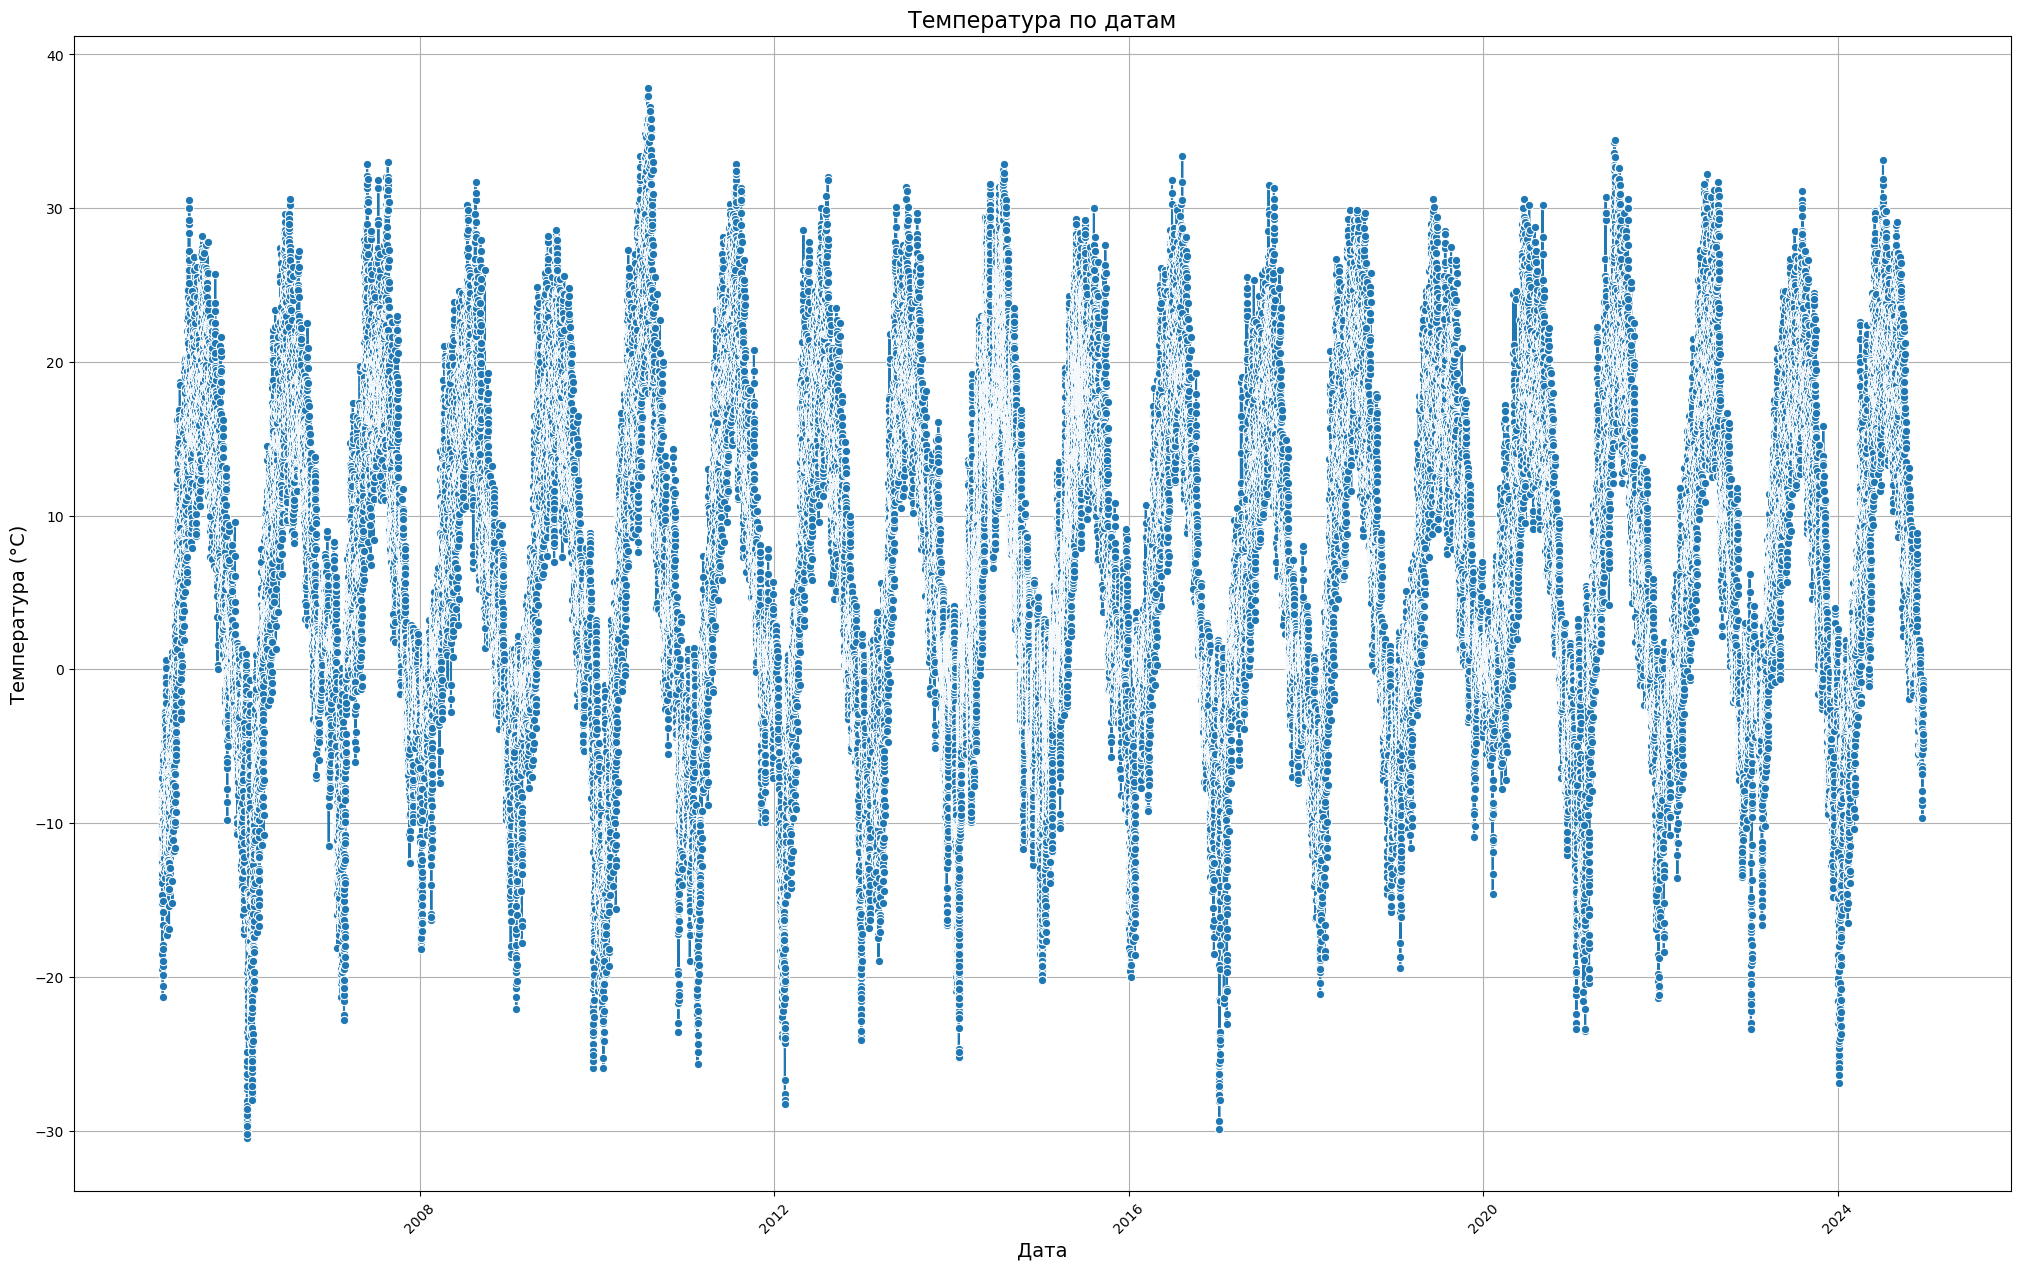

In [28]:
# Построение графика
plt.figure(figsize=(25, 15))  # Размер графика
sns.lineplot(x='TARGET_DATE', y='T', data=result, marker='o')  # Линия с точками
plt.title('Температура по датам', fontsize=16)  # Заголовок
plt.xlabel('Дата', fontsize=14)  # Подпись оси X
plt.ylabel('Температура (°C)', fontsize=14)  # Подпись оси Y
plt.grid(True)  # Сетка на графике
plt.xticks(rotation=45)  # Поворот подписей на оси X для читаемости
plt.show()

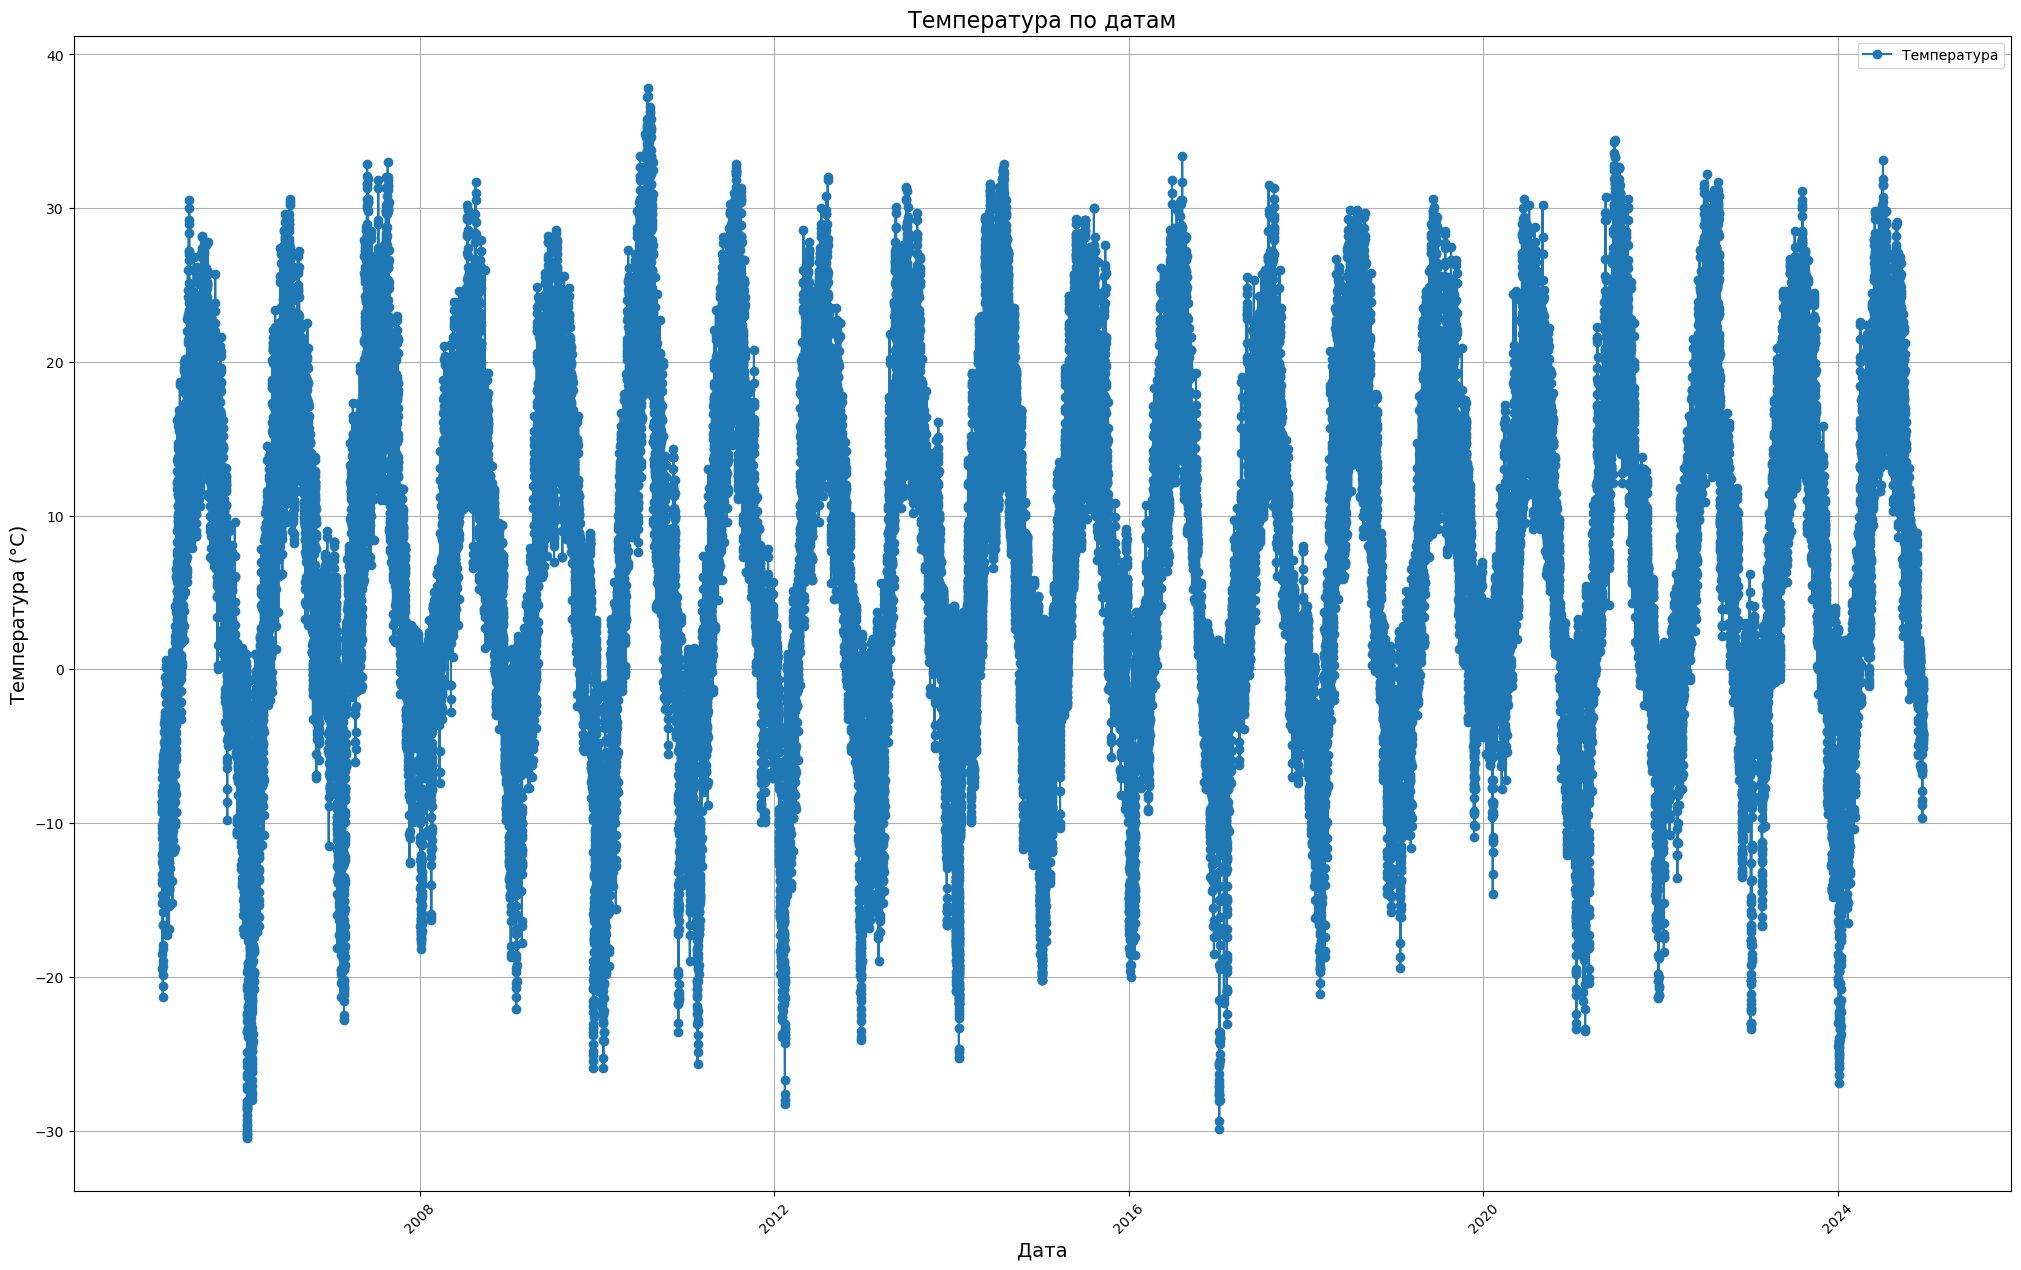

In [29]:
# Построение линейного графика
plt.figure(figsize=(25, 15))
plt.plot(result['TARGET_DATE'], result['T'], marker='o', label='Температура')
plt.title('Температура по датам', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Температура (°C)', fontsize=14)
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

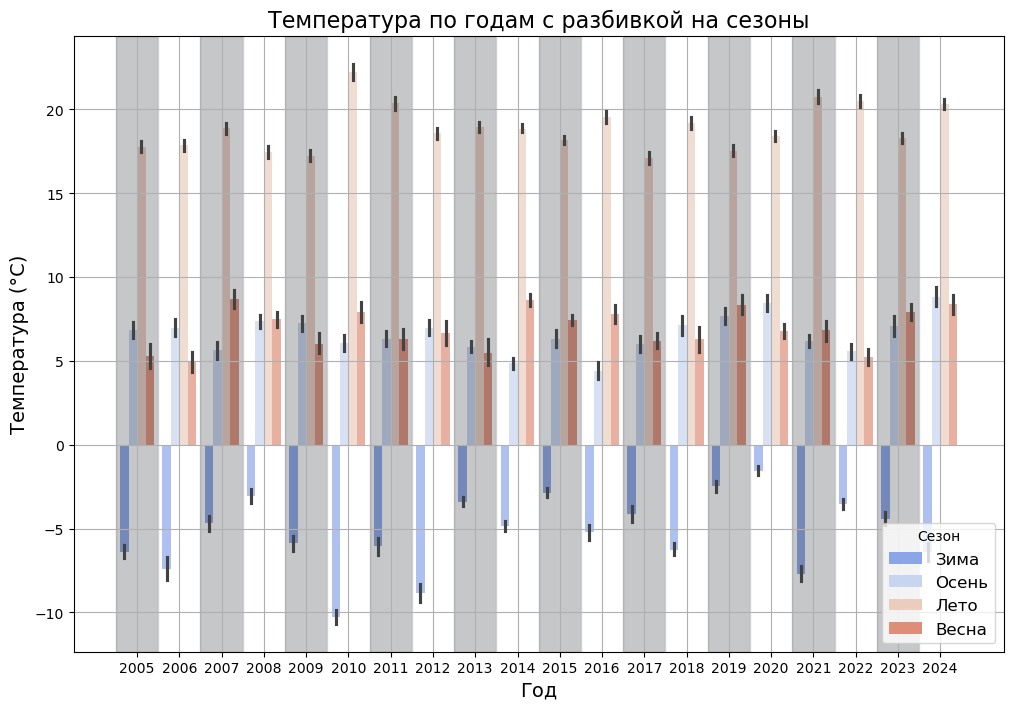

In [30]:
# Добавление столбца "Сезон"
def get_season(month):
    if month in [12, 1, 2]:
        return 'Зима'
    elif month in [3, 4, 5]:
        return 'Весна'
    elif month in [6, 7, 8]:
        return 'Лето'
    else:
        return 'Осень'
        
df = result.copy()
df['Год'] = df['TARGET_DATE'].dt.year
df['Сезон'] = df['TARGET_DATE'].dt.month.apply(get_season)

# Построение графика
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Год', y='T', hue='Сезон', data=df, palette='coolwarm')

# Добавление фона для каждого года
unique_years = sorted(df['Год'].unique())
colors = ['#45464f', '#ffffff']  # Цвета фона для каждого года

for i, year in enumerate(unique_years):
    ax.axvspan(i - 0.5, i + 0.5, color=colors[i % len(colors)], alpha=0.3)

# Настройки графика
plt.title('Температура по годам с разбивкой на сезоны', fontsize=16)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Температура (°C)', fontsize=14)
plt.legend(title='Сезон', fontsize=12)
plt.grid(True)
plt.show()

/tmp/ipykernel_258632/1104345647.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Год', y='T', data=data, ax=ax, palette=[color], order=sorted(data['Год'].unique()))
/tmp/ipykernel_258632/1104345647.py:29: UserWarning: 
The palette list has fewer values (1) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Год', y='T', data=data, ax=ax, palette=[color], order=sorted(data['Год'].unique()))
/tmp/ipykernel_258632/1104345647.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Год', y='T', data=data, ax=ax, palette=[color], order=sorted(data['Год'].unique()))
/tmp/ipykernel_258632/1104345647.py:32: UserWarning: 
The palette list has fewer va

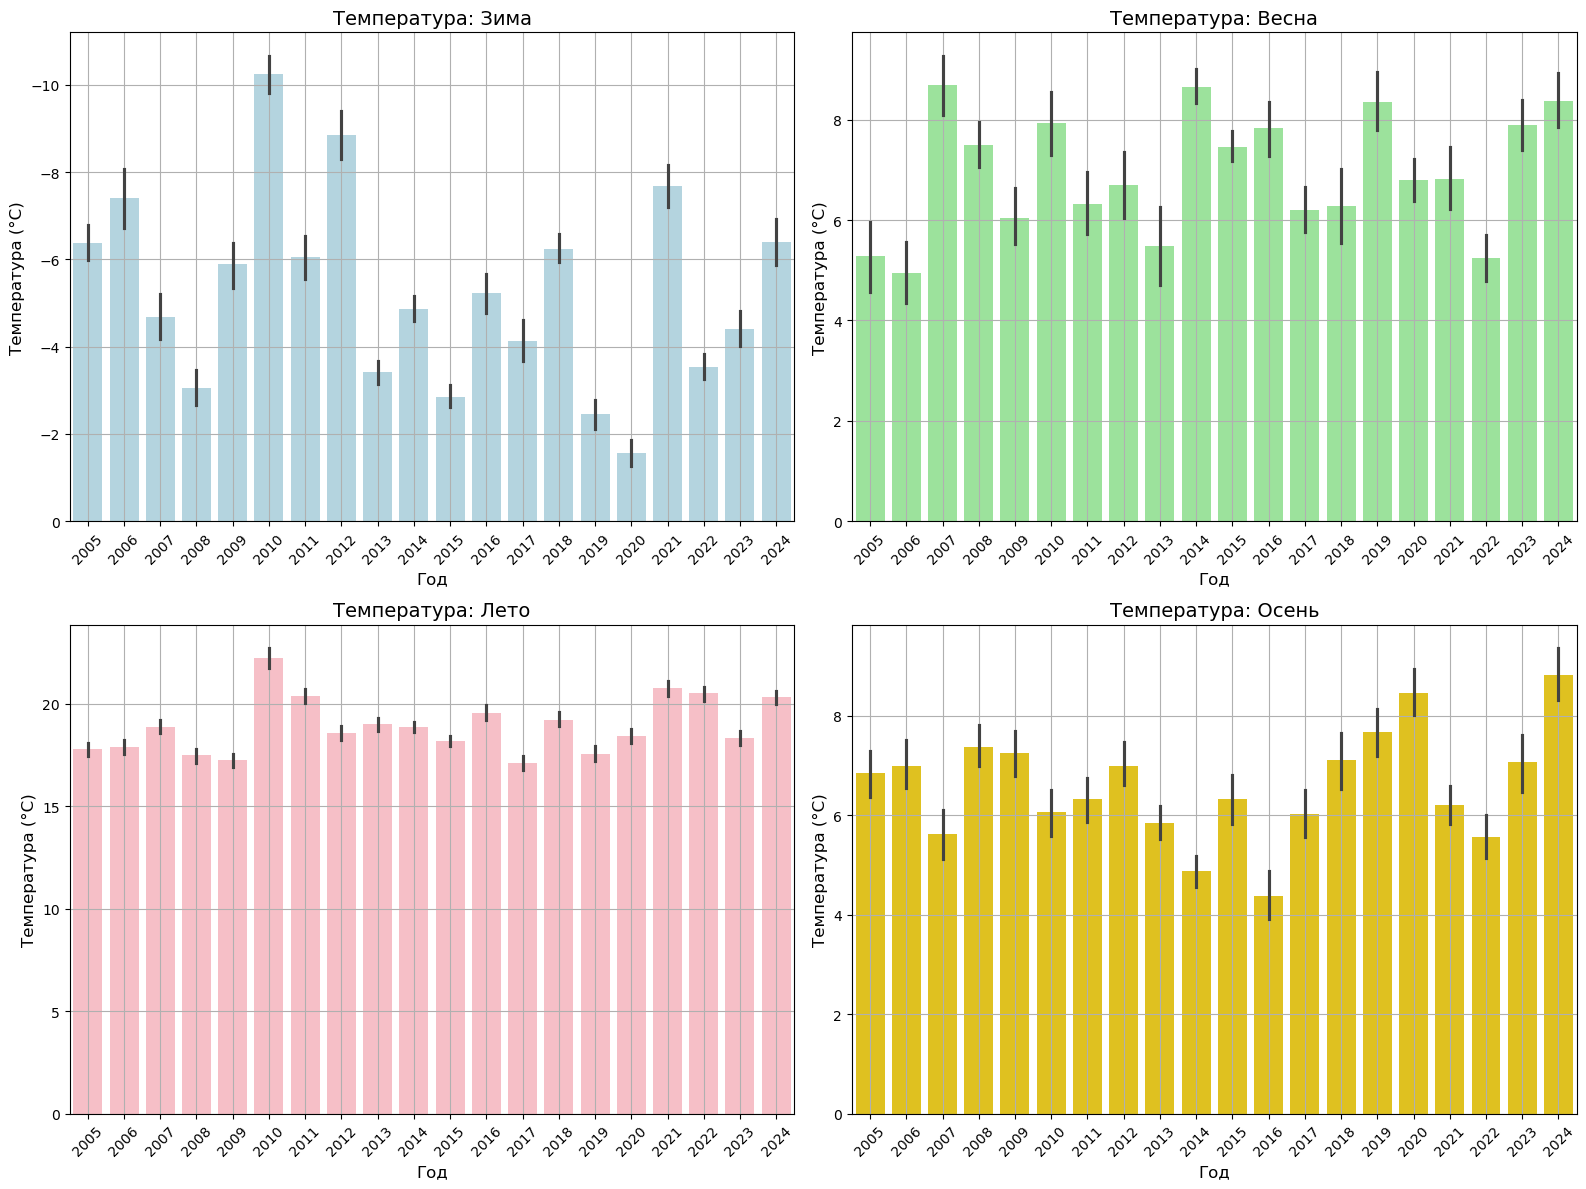

In [31]:
# Добавление столбца "Сезон"
def get_season(month):
    if month in [12, 1, 2]:
        return 'Зима'
    elif month in [3, 4, 5]:
        return 'Весна'
    elif month in [6, 7, 8]:
        return 'Лето'
    else:
        return 'Осень'

df = result.copy()
df['Год'] = df['TARGET_DATE'].dt.year
df['Сезон'] = df['TARGET_DATE'].dt.month.apply(get_season)

# Группировка данных по сезонам
seasonal_data = {season: df[df['Сезон'] == season] for season in ['Зима', 'Весна', 'Лето', 'Осень']}

# Настройка графиков
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
seasons = ['Зима', 'Весна', 'Лето', 'Осень']
colors = ['#ADD8E6', '#90EE90', '#FFB6C1', '#FFD700']  # Цвета для сезонов

for ax, season, color in zip(axes.flatten(), seasons, colors):
    data = seasonal_data[season]
    if not data.empty:
        if season == 'Зима':
            # Для зимы переворачиваем столбцы
            sns.barplot(x='Год', y='T', data=data, ax=ax, palette=[color], order=sorted(data['Год'].unique()))
            ax.invert_yaxis()
        else:
            sns.barplot(x='Год', y='T', data=data, ax=ax, palette=[color], order=sorted(data['Год'].unique()))

        ax.set_title(f'Температура: {season}', fontsize=14)
        ax.set_xlabel('Год', fontsize=12)
        ax.set_ylabel('Температура (°C)', fontsize=12)
        ax.tick_params(axis='x', rotation=45) 
        ax.grid(True)

plt.tight_layout()
plt.show()

In [32]:
df = result.copy()
# Преобразуем дни недели в числовой формат
df['DayOfWeek_Num'] = (
    df[['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']]
    .idxmax(axis=1)
    .map({
        'Понедельник': 0,
        'Вторник': 1,
        'Среда': 2,
        'Четверг': 3,
        'Пятница': 4,
        'Суббота': 5,
        'Воскресенье': 6
    })
)

# Расчет корреляции Спирмена
corr, p_value = spearmanr(df['DayOfWeek_Num'], df['T'])
print(f"Корреляция Спирмена:")
print(f"Коэффициент корреляции: {corr:.4f}")
print(f"P-значение: {p_value:.4f}")

print("\n---------------------------------------------------------------------------------------\n")

# Группировка данных по дням недели для ANOVA
days = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
groups = [df[df[day] == 1]['T'] for day in days]

# Удаление пустых групп
groups = [group for group in groups if not group.empty]

# Проведение ANOVA анализа
f_statistic, p_value_anova = f_oneway(*groups)
print(f"ANOVA анализ:")
print(f"F-статистика: {f_statistic:.4f}")
print(f"P-значение: {p_value_anova:.4f}")


Корреляция Спирмена:
Коэффициент корреляции: -0.0012
P-значение: 0.7575

---------------------------------------------------------------------------------------

ANOVA анализ:
F-статистика: 0.3547
P-значение: 0.9076


In [33]:
# Определение сезона
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Зима'
    elif month in [3, 4, 5]:
        return 'Весна'
    elif month in [6, 7, 8]:
        return 'Лето'
    else:
        return 'Осень'

# Определение светлого или темного времени суток
def is_daylight(row):
    time = row['TARGET_DATE'].time()
    season = row['Сезон']
    
    if season == 'Зима':
        return time >= datetime.strptime('08:30', '%H:%M').time() and time <= datetime.strptime('16:00', '%H:%M').time()
    elif season == 'Весна':
        return time >= datetime.strptime('06:00', '%H:%M').time() and time <= datetime.strptime('19:00', '%H:%M').time()
    elif season == 'Лето':
        return time >= datetime.strptime('03:50', '%H:%M').time() and time <= datetime.strptime('22:10', '%H:%M').time()
    elif season == 'Осень':
        return time >= datetime.strptime('07:30', '%H:%M').time() and time <= datetime.strptime('16:50', '%H:%M').time()
    return False

# Подготовка данных
df = result.copy() 
df['TARGET_DATE'] = pd.to_datetime(df['TARGET_DATE'])
df['Сезон'] = df['TARGET_DATE'].apply(get_season)
df['Светло'] = df.apply(is_daylight, axis=1)

# Расчет корреляции для каждого сезона
seasons = ['Зима', 'Весна', 'Лето', 'Осень']
correlation_results = {}

for season in seasons:
    season_data = df[df['Сезон'] == season]
    if len(season_data) > 1:
        corr, p_value = spearmanr(season_data['T'], season_data['Светло'].astype(int))
        correlation_results[season] = {
            'correlation': corr,
            'p_value': p_value,
            'количество_наблюдений': len(season_data)
        }
    else:
        correlation_results[season] = {
            'correlation': None,
            'p_value': None,
            'количество_наблюдений': len(season_data)
        }

# Вывод результатов
for season, results in correlation_results.items():
    print(f"\nСезон: {season}")
    print(f"Количество наблюдений: {results['количество_наблюдений']}")
    if results['correlation'] is not None:
        print(f"Корреляция: {results['correlation']:.4f}")
        print(f"P-значение: {results['p_value']:.4f}")
    else:
        print("Недостаточно данных для анализа")



Сезон: Зима
Количество наблюдений: 16885
Корреляция: 0.0368
P-значение: 0.0000

Сезон: Весна
Количество наблюдений: 17615
Корреляция: 0.1472
P-значение: 0.0000

Сезон: Лето
Количество наблюдений: 16743
Корреляция: 0.3680
P-значение: 0.0000

Сезон: Осень
Количество наблюдений: 16140
Корреляция: 0.1022
P-значение: 0.0000


/tmp/ipykernel_258632/435736126.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_temp.index, y=avg_temp.values, ax=ax,
/tmp/ipykernel_258632/435736126.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_temp.index, y=avg_temp.values, ax=ax,
/tmp/ipykernel_258632/435736126.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_temp.index, y=avg_temp.values, ax=ax,
/tmp/ipykernel_258632/435736126.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` v

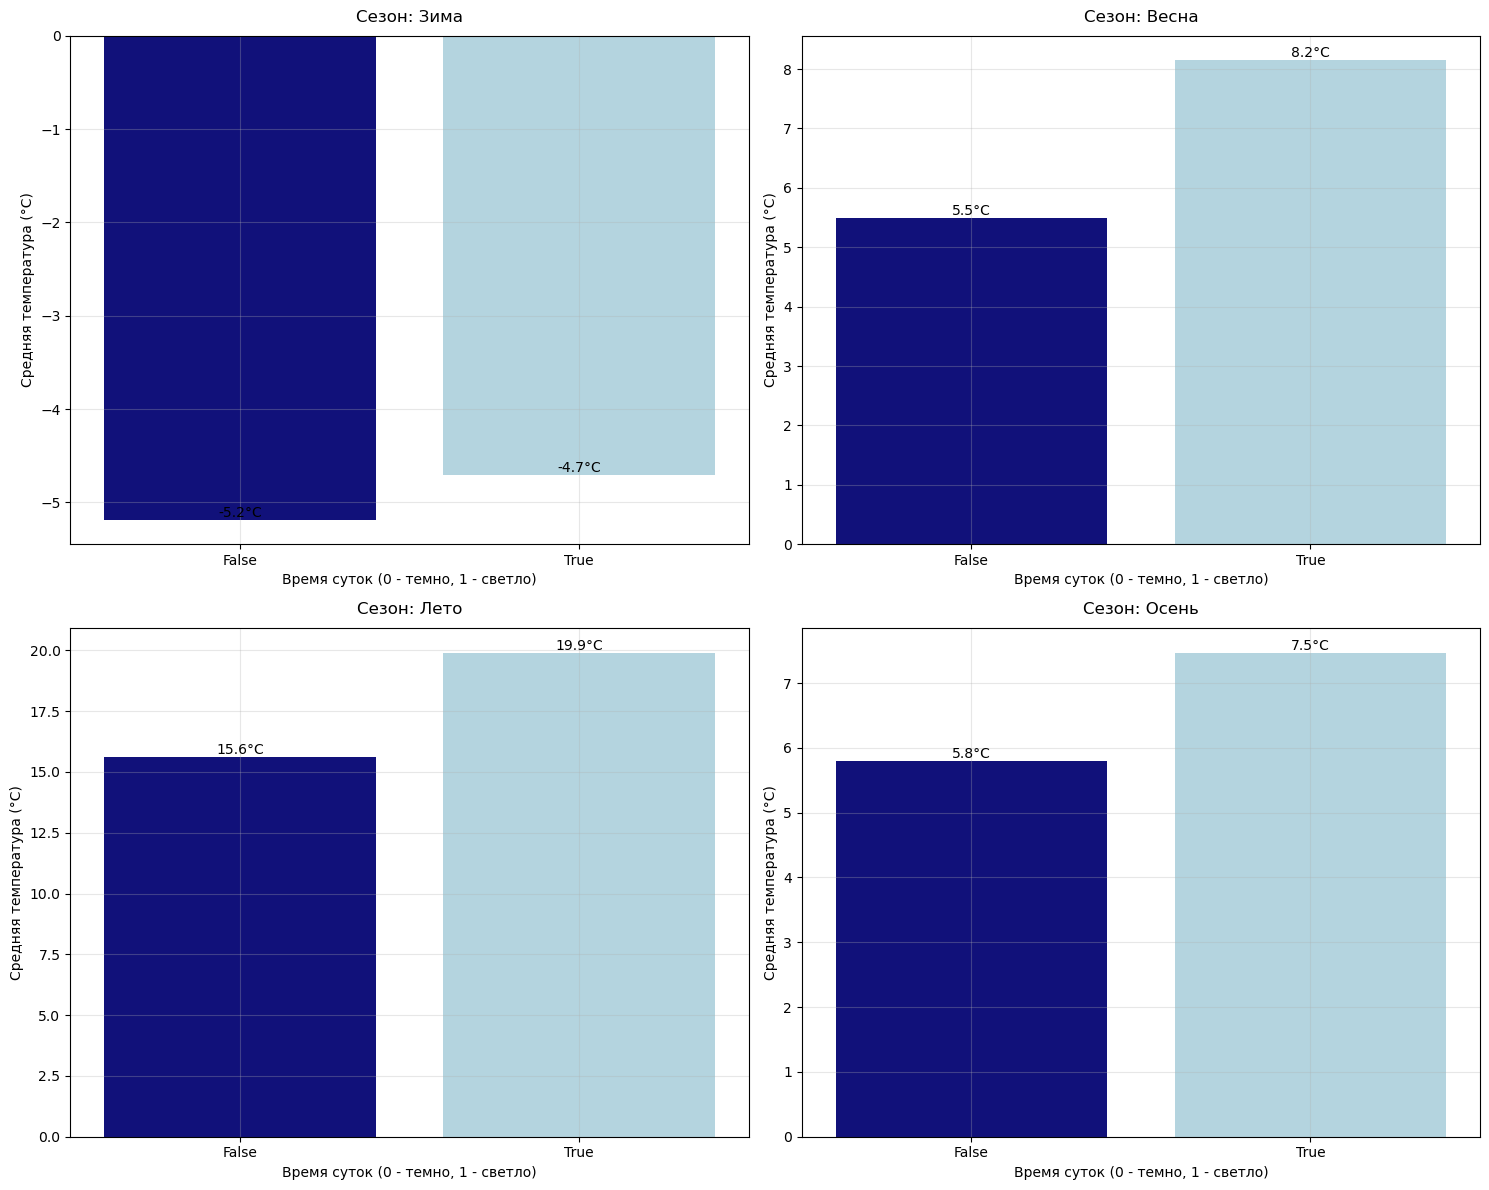

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Создаем графики для каждого сезона
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
seasons = ['Зима', 'Весна', 'Лето', 'Осень']

for ax, season in zip(axes.flatten(), seasons):
    # Выбираем данные для конкретного сезона
    season_data = df[df['Сезон'] == season]
    
    # Вычисляем средние температуры для светлого и темного времени
    avg_temp = season_data.groupby('Светло')['T'].mean()
    
    # Строим столбчатую диаграмму
    sns.barplot(x=avg_temp.index, y=avg_temp.values, ax=ax,
                palette=['darkblue', 'lightblue'])
    
    # Настройка графика
    ax.set_title(f'Сезон: {season}', fontsize=12, pad=10)
    ax.set_xlabel('Время суток (0 - темно, 1 - светло)', fontsize=10)
    ax.set_ylabel('Средняя температура (°C)', fontsize=10)
    ax.grid(True, alpha=0.3)
    
    # Добавляем значения на столбцы
    for i, v in enumerate(avg_temp.values):
        ax.text(i, v, f'{v:.1f}°C', ha='center', va='bottom')

plt.tight_layout()
plt.show()



In [35]:
data_df = df.copy()
data_df.drop(['Понедельник', 'Вторник','Среда','Четверг', 'Пятница', 'Суббота', 'Воскресенье', 'Сезон'], axis=1, inplace=True)

In [36]:
data_df

,T,TARGET_DATE,Зима,Весна,Лето,Осень,Январь,Февраль,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь,Октябрь,Ноябрь,Декабрь,Светло
0,-1.3,2024-12-16 21:00:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False
1,-2.0,2024-12-16 18:00:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False
2,-1.3,2024-12-16 15:00:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,True
3,-1.0,2024-12-16 12:00:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,True
4,-0.9,2024-12-16 09:00:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67385,-6.6,2005-02-01 15:00:00,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
67386,-7.1,2005-02-01 12:00:00,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
67387,-8.6,2005-02-01 09:00:00,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
67388,-8.2,2005-02-01 06:00:00,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [37]:
class TemperatureLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(TemperatureLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.input_size = input_size
        
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

def prepare_data_lstm(df, seq_length=24):
    # Определяем признаки
    features = ['T', 'Зима', 'Весна', 'Лето', 'Осень', 
                'Январь', 'Февраль', 'Март', 'Апрель', 
                'Май', 'Июнь', 'Июль', 'Август', 
                'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь',
                'Светло']
    
    # Преобразуем данные в numpy массив
    data = df[features].values
    
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length, 0])  # только температура
        
    return torch.FloatTensor(X), torch.FloatTensor(y).reshape(-1, 1)

# Параметры модели
input_size = 18  # количество признаков (17 признаков + температура)
hidden_size = 64
num_layers = 2
seq_length = 24
batch_size = 32
num_epochs = 100

# Создание модели
model = TemperatureLSTM(input_size, hidden_size, num_layers)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Подготовка данных
X, y = prepare_data_lstm(data_df, seq_length)

# Обучение модели
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    n_batches = 0
    
    for i in range(0, len(X), batch_size):
        batch_X = X[i:i+batch_size]
        batch_y = y[i:i+batch_size]
        
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        n_batches += 1
    
    avg_loss = total_loss / n_batches
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_loss:.4f}')



/tmp/ipykernel_258632/4182917837.py:35: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  return torch.FloatTensor(X), torch.FloatTensor(y).reshape(-1, 1)


Epoch [10/100], Average Loss: 1.7728
Epoch [20/100], Average Loss: 1.5746
Epoch [30/100], Average Loss: 1.4327
Epoch [40/100], Average Loss: 1.3130
Epoch [50/100], Average Loss: 1.2212
Epoch [60/100], Average Loss: 1.1342
Epoch [70/100], Average Loss: 1.0611
Epoch [80/100], Average Loss: 0.9089
Epoch [90/100], Average Loss: 0.8643
Epoch [100/100], Average Loss: 0.8552


In [38]:
# Предсказание
model.eval()
with torch.no_grad():
    test_sequence = X[-1].unsqueeze(0)  # последняя последовательность
    prediction = model(test_sequence)
    print(f"Предсказанная температура: {prediction.item():.2f}")


Предсказанная температура: -7.33


In [39]:
def calculate_metrics(model, X, y_true):
    model.eval()
    with torch.no_grad():
        # Получаем предсказания модели
        y_pred = model(X).numpy()
        y_true = y_true.numpy()
        
        # Расчет MSE
        mse = mean_squared_error(y_true, y_pred)
        
        # Расчет MAPE с обработкой нулевых значений
        # Исключаем точки, где y_true равно 0
        mask = y_true != 0
        mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
        
        # Альтернативный расчет MAPE для температуры
        # Добавляем смещение, чтобы избежать деления на ноль
        # mape = np.mean(np.abs((y_true - y_pred) / (y_true + 273.15))) * 100  # используем абсолютную шкалу Кельвина
        
        # Расчет R²
        r2 = r2_score(y_true, y_pred)
        
        # Добавим MAE (Mean Absolute Error)
        mae = np.mean(np.abs(y_true - y_pred))
        
        return {
            'MSE': mse,
            'RMSE': np.sqrt(mse),
            'MAPE': mape,
            'MAE': mae,
            'R2': r2
        }

# Расчет метрик
metrics = calculate_metrics(model, X, y)

# Вывод результатов
print(f"MSE: {metrics['MSE']:.4f}")
print(f"RMSE: {metrics['RMSE']:.4f}")
print(f"MAPE: {metrics['MAPE']:.2f}%")
print(f"MAE: {metrics['MAE']:.4f}")
print(f"R²: {metrics['R2']:.4f}")


MSE: 1.6467
RMSE: 1.2832
MAPE: 23.56%
MAE: 0.9092
R²: 0.9859


In [40]:
weather_df_2 = pd.read_csv('data/weather_check.csv', sep=';', usecols=[1])
display(weather_df_2.head())

,T
27.12.2024 06:00,0.7
27.12.2024 03:00,0.5
27.12.2024 00:00,0.4
26.12.2024 21:00,0.4
26.12.2024 18:00,0.5


In [41]:
weather_df_2['date_time'] = weather_df_2.index
weather_df_2.reset_index(drop=True, inplace=True)
weather_df_2

,T,date_time
0,0.7,27.12.2024 06:00
1,0.5,27.12.2024 03:00
2,0.4,27.12.2024 00:00
3,0.4,26.12.2024 21:00
4,0.5,26.12.2024 18:00
...,...,...
78,0.8,17.12.2024 12:00
79,0.4,17.12.2024 09:00
80,0.5,17.12.2024 06:00
81,0.2,17.12.2024 03:00


In [42]:
df = weather_df_2.copy()
df['TARGET_DATE'] = pd.to_datetime(df['date_time'], format='%d.%m.%Y %H:%M')
#  Признаки для дней недели
weekdays = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
for i, day in enumerate(weekdays):
    result[day] = (result['TARGET_DATE'].dt.weekday == i).astype(float)

# Признаки для сезонов
seasons = {
    'Зима': [12, 1, 2],
    'Весна': [3, 4, 5],
    'Лето': [6, 7, 8],
    'Осень': [9, 10, 11]
}
for season, months in seasons.items():
    df[season] = df['TARGET_DATE'].dt.month.isin(months).astype(float)

# Признаки для месяцев
months = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь',
          'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
for i, month in enumerate(months, start=1):
    df[month] = (df['TARGET_DATE'].dt.month == i).astype(float)
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Зима'
    elif month in [3, 4, 5]:
        return 'Весна'
    elif month in [6, 7, 8]:
        return 'Лето'
    else:
        return 'Осень'

# Определение светлого или темного времени суток
def is_daylight(row):
    time = row['TARGET_DATE'].time()
    season = row['Сезон']
    
    if season == 'Зима':
        return time >= datetime.strptime('08:30', '%H:%M').time() and time <= datetime.strptime('16:00', '%H:%M').time()
    elif season == 'Весна':
        return time >= datetime.strptime('06:00', '%H:%M').time() and time <= datetime.strptime('19:00', '%H:%M').time()
    elif season == 'Лето':
        return time >= datetime.strptime('03:50', '%H:%M').time() and time <= datetime.strptime('22:10', '%H:%M').time()
    elif season == 'Осень':
        return time >= datetime.strptime('07:30', '%H:%M').time() and time <= datetime.strptime('16:50', '%H:%M').time()
    return False

# Подготовка данных
df = result.copy() 
df['TARGET_DATE'] = pd.to_datetime(df['TARGET_DATE'])
df['Сезон'] = df['TARGET_DATE'].apply(get_season)
df['Светло'] = df.apply(is_daylight, axis=1)

/tmp/ipykernel_258632/1986198217.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result[day] = (result['TARGET_DATE'].dt.weekday == i).astype(float)
/tmp/ipykernel_258632/1986198217.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result[day] = (result['TARGET_DATE'].dt.weekday == i).astype(float)
/tmp/ipykernel_258632/1986198217.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [43]:
df

,T,TARGET_DATE,Понедельник,Вторник,Среда,Четверг,Пятница,Суббота,Воскресенье,Зима,...,Май,Июнь,Июль,Август,Сентябрь,Октябрь,Ноябрь,Декабрь,Сезон,Светло
0,-1.3,2024-12-16 21:00:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Зима,False
1,-2.0,2024-12-16 18:00:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Зима,False
2,-1.3,2024-12-16 15:00:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Зима,True
3,-1.0,2024-12-16 12:00:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Зима,True
4,-0.9,2024-12-16 09:00:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Зима,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67385,-6.6,2005-02-01 15:00:00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Зима,True
67386,-7.1,2005-02-01 12:00:00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Зима,True
67387,-8.6,2005-02-01 09:00:00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Зима,True
67388,-8.2,2005-02-01 06:00:00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Зима,False


In [44]:
def prepare_test_data(df, seq_length=24):
    # Преобразуем данные в нужный формат
    df['TARGET_DATE'] = pd.to_datetime(df['TARGET_DATE'])
    df['Светло'] = df['Светло'].astype(float)
    
    # Определяем признаки
    features = ['T', 'Зима', 'Весна', 'Лето', 'Осень', 
                'Январь', 'Февраль', 'Март', 'Апрель', 
                'Май', 'Июнь', 'Июль', 'Август', 
                'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь',
                'Светло']
    
    # Преобразуем данные в numpy массив
    data = df[features].values
    
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length, 0])  # только температура
        
    return torch.FloatTensor(X), torch.FloatTensor(y).reshape(-1, 1)

# Подготовка тестовых данных
test_df = df.copy()
X_test, y_test = prepare_test_data(test_df)

def calculate_test_metrics(y_true, y_pred):
    # Расчет MSE
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    
    # Расчет MAE
    mae = np.mean(np.abs(y_true - y_pred))
    
    # Расчет MAPE с обработкой нулевых значений
    mask = y_true != 0  # исключаем нулевые значения
    mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
    
    # Расчет R²
    r2 = r2_score(y_true, y_pred)
    
    return {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape,
        'R2': r2
    }

# Получение предсказаний
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    metrics = calculate_test_metrics(y_test.numpy(), y_pred.numpy())

# Вывод результатов
for metric, value in metrics.items():
    if metric == 'MAPE':
        print(f"{metric}: {value:.2f}%")
    else:
        print(f"{metric}: {value:.4f}")


MSE: 1.6467
RMSE: 1.2832
MAE: 0.9092
MAPE: 23.56%
R2: 0.9859


In [45]:
def prepare_input_data(date_time):
    """Подготовка начальных признаков из даты"""
    date_time = pd.Timestamp(date_time)
    
    # Создаем признаки
    data = {
        'T': [0],  # Добавляем температуру (будет заменена при предсказании)
        'Зима': [1.0 if date_time.month in [12, 1, 2] else 0.0],
        'Весна': [1.0 if date_time.month in [3, 4, 5] else 0.0],
        'Лето': [1.0 if date_time.month in [6, 7, 8] else 0.0],
        'Осень': [1.0 if date_time.month in [9, 10, 11] else 0.0],
        'Январь': [1.0 if date_time.month == 1 else 0.0],
        'Февраль': [1.0 if date_time.month == 2 else 0.0],
        'Март': [1.0 if date_time.month == 3 else 0.0],
        'Апрель': [1.0 if date_time.month == 4 else 0.0],
        'Май': [1.0 if date_time.month == 5 else 0.0],
        'Июнь': [1.0 if date_time.month == 6 else 0.0],
        'Июль': [1.0 if date_time.month == 7 else 0.0],
        'Август': [1.0 if date_time.month == 8 else 0.0],
        'Сентябрь': [1.0 if date_time.month == 9 else 0.0],
        'Октябрь': [1.0 if date_time.month == 10 else 0.0],
        'Ноябрь': [1.0 if date_time.month == 11 else 0.0],
        'Декабрь': [1.0 if date_time.month == 12 else 0.0],
        'Светло': [1.0 if (
            (date_time.month in [12, 1, 2] and 8 <= date_time.hour <= 16) or
            (date_time.month in [3, 4, 5] and 6 <= date_time.hour <= 19) or
            (date_time.month in [6, 7, 8] and 4 <= date_time.hour <= 22) or
            (date_time.month in [9, 10, 11] and 7 <= date_time.hour <= 17)
        ) else 0.0]
    }
    
    # Преобразуем в DataFrame
    return pd.DataFrame(data)

def prepare_prediction_data(date_time, seq_length=24):
    """Подготовка данных для предсказания"""
    # Получаем базовые признаки
    current_data = prepare_input_data(date_time)
    
    # Преобразуем DataFrame в тензор нужной размерности
    features = current_data.values
    features = np.tile(features, (seq_length, 1))  # Повторяем данные seq_length раз
    features = torch.FloatTensor(features).unsqueeze(0)  # Добавляем размерность батча
    
    return features



In [46]:
# Пример использования
date = "2025-01-01 15:54:00"
prepared_data = prepare_prediction_data(date)

# Получение предсказания
model.eval()
with torch.no_grad():
    prediction = model(prepared_data)
    print(f"Предсказанная температура на {date}: {prediction.item():.2f}°C")



Предсказанная температура на 2025-01-01 15:54:00: -0.25°C


In [47]:
# Создаем директорию для сохранения модели
model_dir = './weather_lstm_model'
os.makedirs(model_dir, exist_ok=True)

# Сохранение модели
# Сохранение модели
def save_model(model, path):
    torch.save(model.state_dict(), path)

save_model(model, os.path.join(model_dir, 'model.pth'))

In [48]:
# Загрузка модели
def load_model(model_path):
    # Определяем устройство
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    # Создаем модель с теми же параметрами
    model = TemperatureLSTM(
        input_size=18,  # Количество признаков
        hidden_size=64,
        num_layers=2
    )
    
    # Загружаем веса
    state_dict = torch.load(model_path, map_location=device, weights_only=True)
    model.load_state_dict(state_dict)
    
    # Переносим модель на нужное устройство и переводим в режим оценки
    model = model.to(device)
    model.eval()
    
    return model

def predict_temperature(date_time, model):
    device = next(model.parameters()).device
    
    with torch.no_grad():
        # Подготовка данных
        prepared_data = prepare_prediction_data(date_time)
        prepared_data = prepared_data.to(device)
        
        # Получение предсказания
        prediction = model(prepared_data)
        return prediction.item()




In [51]:
# Пример использования
loaded_model = load_model(os.path.join(model_dir, 'model.pth'))
date = "2024-12-16 15:00:00"
predicted_temp = predict_temperature(date, loaded_model)
print(f"Предсказанная температура на {date}: {predicted_temp:.2f}°C")

Предсказанная температура на 2024-12-16 15:00:00: -0.03°C
